## Homework 3

### Statement of Non-cheating and honest collaboration:

I have been informed of the academic honesty policies of Georgia State University. I will abide by those policies. I have written up the solutions below by myself and understand what I have turned in. I collaborated and discussed the problems with the following people: ```[insert here]```

Signed,
```[your name here]```

__Please change the notebook's name and add your name before submitting.__

### Part I - Visual Data Analytics (50 pts)

In this part, you are given a seed characteristics dataset. The dataset file is slightly modified and included in the zip file for easier reading (please put it in the same directory as this notebook file). The dataset includes measurements of geometrical properties of kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian (which are represented with group feature). For each group you have 70 instances each. You can find the information about the dataset (here)[info about the dataset https://archive.ics.uci.edu/ml/datasets/seeds ]. Answer the seven questions provided below. Provide your remarks as comments.

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
data = pd.read_csv('/content/seeds_dataset.csv', sep='\t') # info about the dataset https://archive.ics.uci.edu/ml/datasets/seeds
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area                  210 non-null    float64
 1   perimeter             210 non-null    float64
 2   compactness           210 non-null    float64
 3   kernel_length         210 non-null    float64
 4   kernel_width          210 non-null    float64
 5   asymmetry_coef        210 non-null    float64
 6   kernel_groove_length  210 non-null    float64
 7   group                 210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [3]:
data

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coef,kernel_groove_length,group
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


#### Q-1 [6 pts] -- How do the different attributes of wheat vary with respect to each other? What are your inferences?

Hint: Use seaborn's heatmap() function to visualize the correlation between different attributes of the kernels.

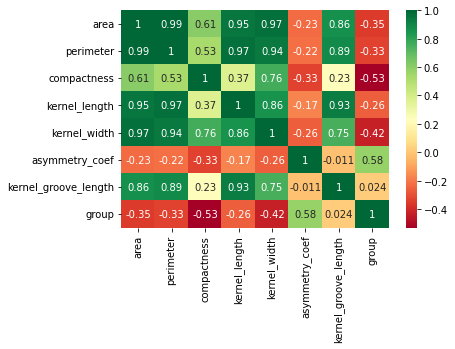

In [8]:
# Your solution goes here  
p=sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')  

#### Q-2 [7 pts] -- Compare the distribution of area of kernels among different varieties of wheat and identify which variety has the largest spread in terms of area of kernels and comment on the distibution.

Hint: Use boxplot of the 'area' column grouped by the 'group' column. Examine the spread of the boxes, which are defined by the interquartile range (IQR), as well as the presence of outliers. Use pandas group() and agg() functions to calculate the range of the area of kernels for each variety and output the values respectively.

area       
         min    max
group              
1      11.23  17.08
2      15.38  21.18
3      10.59  13.37

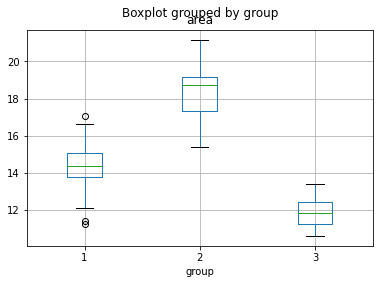

In [13]:
# Your solution goes here
data.boxplot(column='area', by='group')
data.groupby('group').agg({'area':['min','max']})

#### Q3 [6 pts] -- Create a boxplot for asymmetry_coef parameter. 
However, to depict the potential outliers clearly, instead of using (Q1-1.5IQR, Q3+1.5IQR) use only top 5% (interval of 0 to 95 percentile) for placing your whiskers. Identify the potential outlying points thresholds for each group for asymmetry_coef parameter.

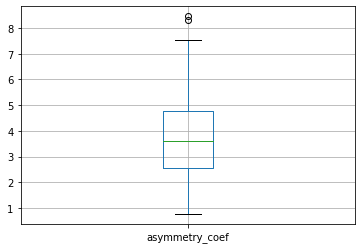

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coef,kernel_groove_length,group
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [15]:
# Your solution goes here
data.boxplot(column='asymmetry_coef')
plt.show()
data.describe()

#### Q-4 [7 pts] -- Compare the distribution of the perimeter of the kernel among different varieties of wheat, taking into account both the shape and spread of the data. What can you infer about the relationship between the perimeter of the kernel and the variety of wheat?

Hint: Use a violin plot that shows the distribution of the perimeter of the kernel among different varieties of wheat.

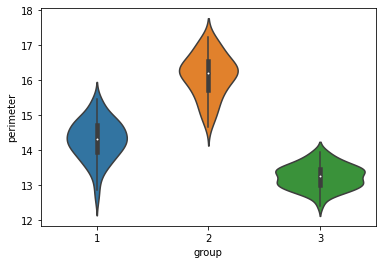

In [17]:
# Your solution goes here
sns.violinplot(x = 'group', y = 'perimeter', data = data)

plt.show()

#### Q-5 [8 pts] -- Compare the relationship between the compactness of the kernel and the asymmetry coefficient for different varieties of wheat. Are there any patterns or outliers in the data that stand out?

Hint: Use seaborn's scatterplot() to visualize the relationship between the compactness of the kernel and the asymmetry coefficient 

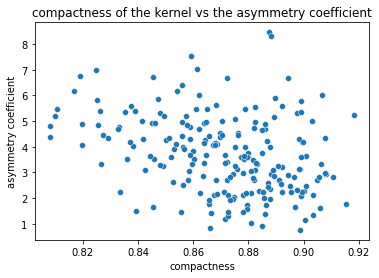

In [23]:
# Your solution goes here
sns.scatterplot(x=data['compactness'], y=data['asymmetry_coef'])
plt.title('compactness of the kernel vs the asymmetry coefficient')
plt.xlabel('compactness')
plt.ylabel('asymmetry coefficient')
plt.show()

#### Q6 [8 pts] -- Analyze the relationship between kernel length and kernel width parameter. 
Create a scatter plot (use length and width values for x and y axis), use different colors for instances from different groups. 

What can you say about the relationship amoung kernel length, kernel width and group features. 

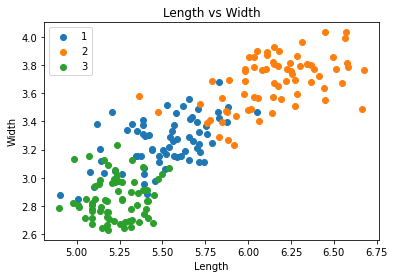

In [24]:
# Your solution goes here
for group in data['group'].unique():
    plt.scatter(data[data['group'] == group]['kernel_length'], data[data['group'] == group]['kernel_width'], label=group)

plt.title('Length vs Width')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()

#### Q7 [8 pts] -- Create an equi-frequency histogram plot for 'perimeter' feature using 20 bins. 
Make sure you display the density values and not counts. How is the 'perimeter' feature's values are distributed in this dataset? Identify a candidate probability distribution.

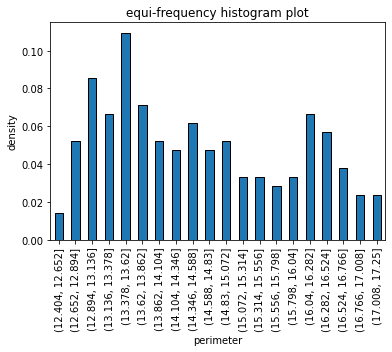

In [28]:
# Your solution goes here
perimeter_data = data['perimeter'].value_counts(bins=20, sort=False, normalize=True).sort_index()
perimeter_data.plot(kind='bar', edgecolor='black')
plt.xlabel('perimeter')
plt.ylabel('density')
plt.title('equi-frequency histogram plot')
plt.show()


### Part II - Analyzing Boosting Tree Ensembles (30 pts)

Boosting is a type of ensemble methods that combines the predictions from many base (or weak) learners sequentially. A base learner in this case is often a simple model (in our case, a decision tree classifiers). Adaptive Boosting (AdaBoost) algorithm is one of the well-known boosting methods, which involves using relatively small trees sequentially trained. Consecutive models attempt to refine and correct the predictions made by the previous model by weighing the training dataset and assigning more importance on training instances which the prior model made prediction errors.

You will again use the seeds dataset from Part I. Please read it again using the following code snippet and answer the questions.

In [33]:
# Your solution goes here
data

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coef,kernel_groove_length,group
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


#### Q1 [5 pts] - Create training and testing datasets.
Use the DataFrame created above from `seeds` dataset. You can use `train_test_split` from `sklearn.model_selection`.  The `random_state` parameter in `train_test_split` should be set to your panther id number's last two digits and the training set should have 3 times more instances than the testing set (i.e., 75%-25% split).

In [34]:
# Your solution goes here
X = data.drop('group', axis=1)
y = data['group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Q2 [15 pts] - Training and testing a simple decision tree model
Using sklearn's decision tree classifier (`DecisionTreeClassifier`), initialize a tree-based classification model. Set the max_depth to 2. Then, train and test the error rate of your classifier. Also, include the confusion matrix and the error rate for your classifier.

In [40]:
# Your solution goes here
dtc = DecisionTreeClassifier(max_depth=2)
dtc

DecisionTreeClassifier(max_depth=2)

In [42]:
# train Decision Tree Classifier
dtc = dtc.fit(X_train, y_train)

# predict labels
y_pred = dtc.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# accuracy score
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

[[11  0  3]
 [ 0 18  0]
 [ 5  0 16]]
Accuracy: 0.8490566037735849


#### Q3 [10 pts] - Visualize the trained decision tree and interpret the feature importance
Visualize the decision tree and identify the most informative feature in your training set (with the highest information gain). 

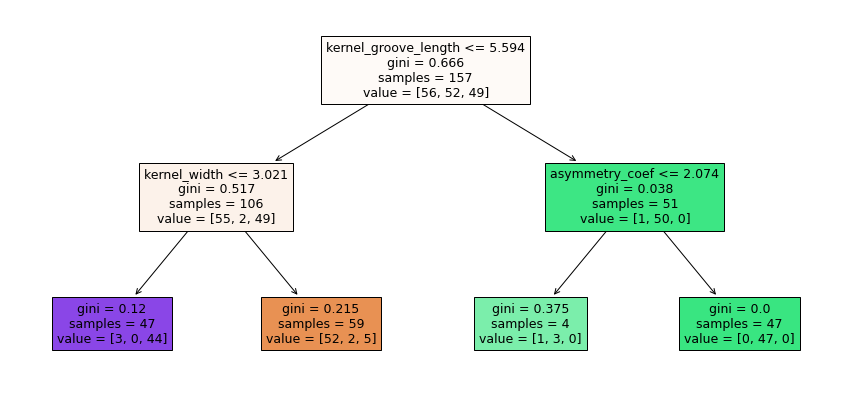

In [47]:
# Your solution goes here
plt.figure(figsize=(15,7))
tree.plot_tree(dtc, filled=True, feature_names=X_train.columns)
plt.show()